In [54]:
library(coda)
library(rjags)
library(R2jags)

In [55]:
data<-read.csv("data/changes.csv")

In [56]:
model.loc <- ("model/univ_ss_model.txt")
jagsscript <- cat("
model {  
   # priors on parameters
   u ~ dnorm(0, 0.01); 
   inv.q ~ dgamma(0.001,0.001); 
   q <- 1/inv.q;
   inv.r ~ dgamma(0.001,0.001);
   r <- 1/inv.r; 
   X0 ~ dnorm(Y1, 0.001);
   
   # likelihood
   X[1] ~ dnorm(X0 + u, inv.q);
   EY[1] <- X[1];
   Y[1] ~ dnorm(EY[1], inv.r);
   for(t in 2:N) {
      X[t] ~ dnorm(X[t-1] + u, inv.q);
      EY[t] <- X[t];
      Y[t] ~ dnorm(EY[t], inv.r); 
   }
}  
", 
    file = model.loc)

In [57]:
revised <- data$revised
reported <- data$reported

In [58]:
jags.data <- list(Y = c(reported,1100), X=c(revised, NA), N = length(reported)+1, Y1 = 0)
mod_ss <- jags.model(file = model.loc, data=jags.data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1208
   Unobserved stochastic nodes: 356
   Total graph size: 2275

Initializing model



In [59]:
run_jag <- coda.samples(mod_ss, variable.names = c("u", "q", "r", "X[780]"), n.iter=100000)

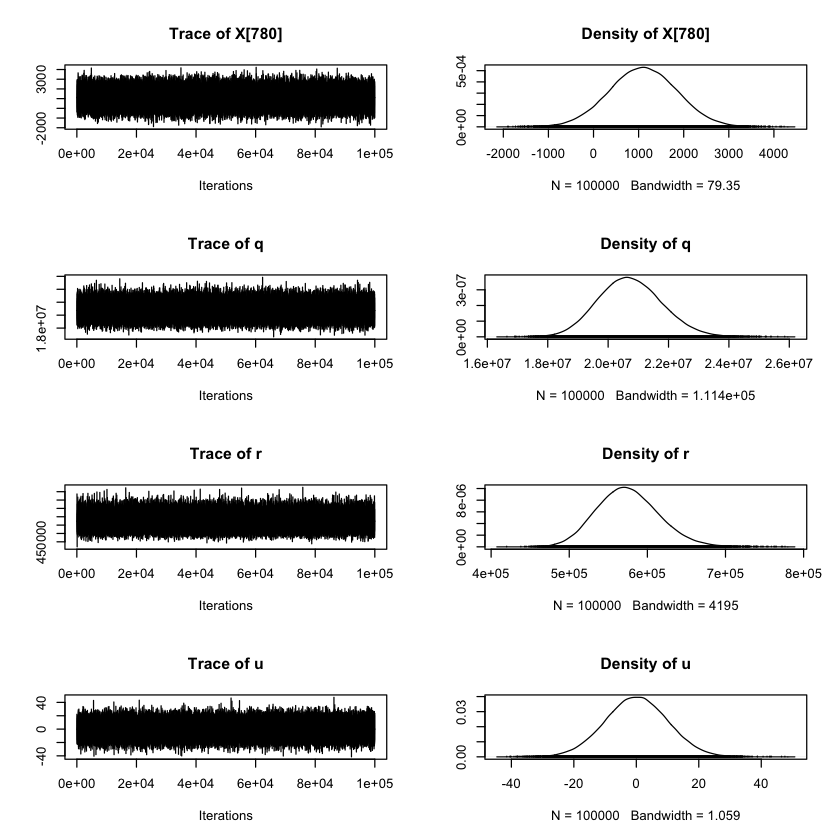

In [60]:
plot(run_jag)

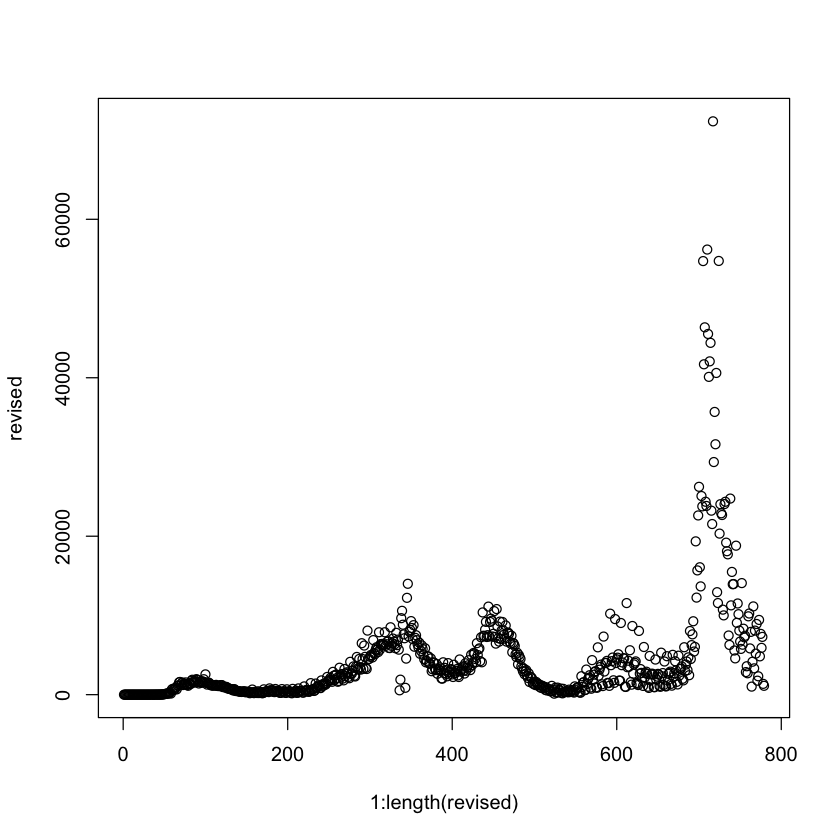

In [61]:
plot(1:length(revised), revised)